<a href="https://colab.research.google.com/github/mercy-ndungu/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import utility libraries
import pandas as pd
import numpy as np

#import mathematical libraries
import math

#Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Algorithm, Evaluation, and Model Libraries
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats



In [44]:
# Load, import and mount dataset from Google DRive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path ='/content/drive/MyDrive/dataset/churn.csv'
churn_data = pd.read_csv(data_path)


Mounted at /content/drive


In [45]:
#view the first few rows of a dataset and a quick overview of the data's structure and contents
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The .head() method is the first step of data exploration and analysis. Using the .head() method we get a quick glimpse of the structure and content of our data. From that we can see that our data has customer ID, gender, seniorCitizen, patner, dependents, tenure, phone service , the probalility of a customer having multiple lines, internet service, etc..


In [46]:
#see the shape of the data in terms of how many columns and rows it has
churn_data.shape


(7043, 21)

In conclusion,the .shape method,informs that data has 7043 rows and 21 columns

In [47]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set has 18 columns with objects, i with a float and 2 with integer values

In [49]:
# do descriptive analysis of numeric columns in the churn_data dataframe
churn_data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [50]:
#Printing the count of true and false in the Churn column
print(churn_data.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


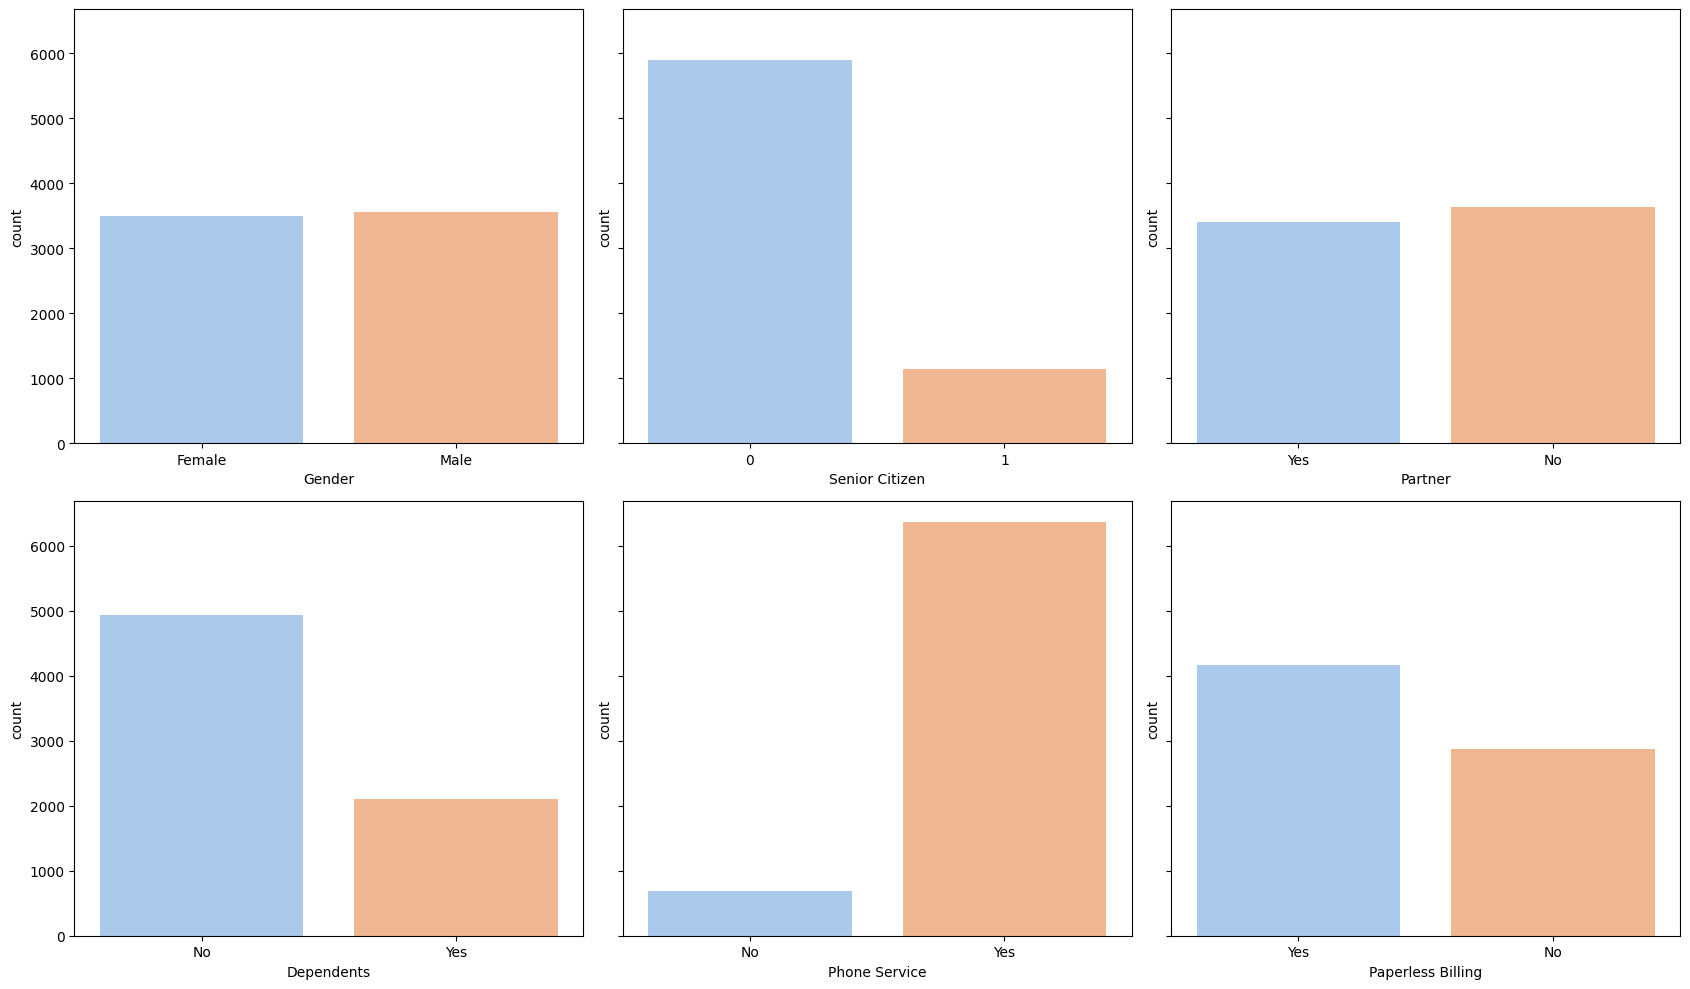

In [51]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(17, 10), sharey=True)

    # Plot countplots for each categorical variable
    sns.countplot(x="gender", data=churn_data, ax=axes[0, 0])
    sns.countplot(x="SeniorCitizen", data=churn_data, ax=axes[0, 1])
    sns.countplot(x="Partner", data=churn_data, ax=axes[0, 2])
    sns.countplot(x="Dependents", data=churn_data, ax=axes[1, 0])
    sns.countplot(x="PhoneService", data=churn_data, ax=axes[1, 1])
    sns.countplot(x="PaperlessBilling", data=churn_data, ax=axes[1, 2])


    # Add labels and titles
axes[0, 0].set_xlabel("Gender")
axes[0, 1].set_xlabel("Senior Citizen")
axes[0, 2].set_xlabel("Partner")
axes[1, 0].set_xlabel("Dependents")
axes[1, 1].set_xlabel("Phone Service")
axes[1, 2].set_xlabel("Paperless Billing")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

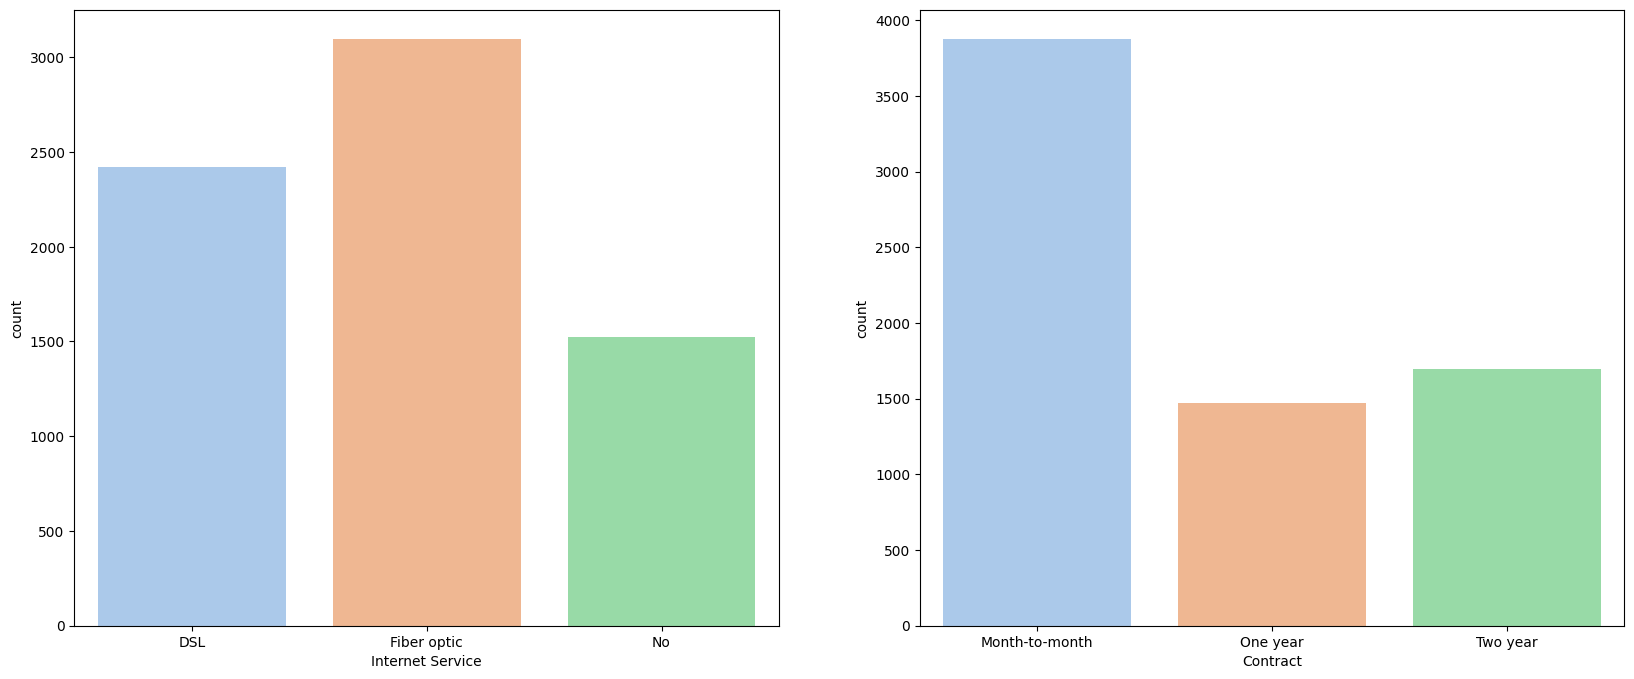

In [52]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot the countplot for "InternetService" variable
    sns.countplot(x="InternetService", data=churn_data, ax=axes[0])
    sns.countplot(x="Contract", data=churn_data, ax=axes[1])



# Add labels and titles
axes[0].set_xlabel("Internet Service")
axes[1].set_xlabel("Contract")


# Show the plot
plt.show()

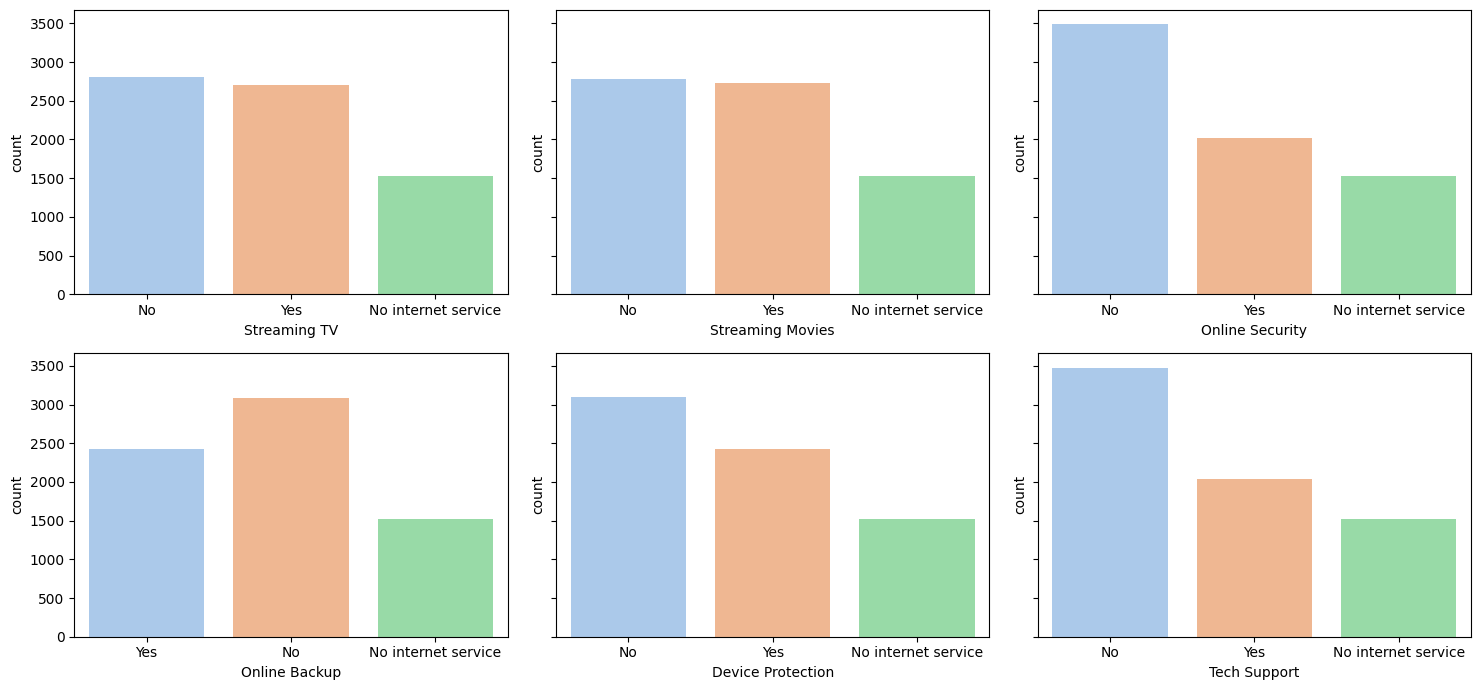

In [53]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True)
    sns.countplot(x="StreamingTV", data=churn_data, ax=axes[0, 0])
    sns.countplot(x="StreamingMovies", data=churn_data, ax=axes[0, 1])
    sns.countplot(x="OnlineSecurity", data=churn_data, ax=axes[0, 2])
    sns.countplot(x="OnlineBackup", data=churn_data, ax=axes[1, 0])
    sns.countplot(x="DeviceProtection", data=churn_data, ax=axes[1, 1])
    sns.countplot(x="TechSupport", data=churn_data, ax=axes[1, 2])

# Add labels and titles
axes[0, 0].set_xlabel("Streaming TV")
axes[0, 1].set_xlabel("Streaming Movies")
axes[0, 2].set_xlabel("Online Security")
axes[1, 0].set_xlabel("Online Backup")
axes[1, 1].set_xlabel("Device Protection")
axes[1, 2].set_xlabel("Tech Support")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


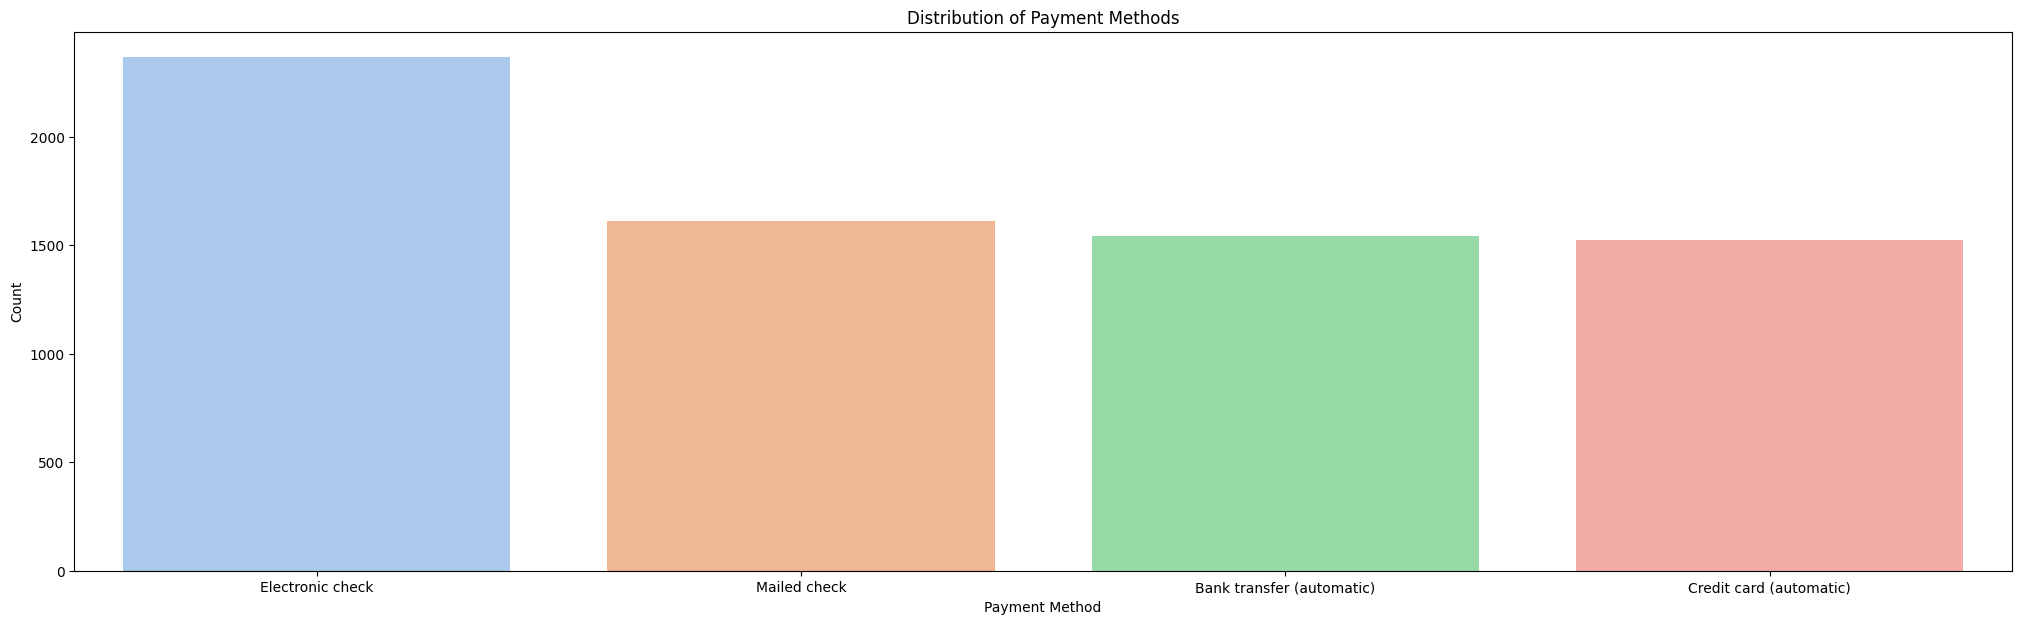

In [54]:
with sns.color_palette("pastel"):
    fig, ax = plt.subplots(figsize=(25, 7))

    # Plot the countplot for "PaymentMethod" variable
    sns.countplot(x="PaymentMethod", data=churn_data, ax=ax)

# Add labels and titles if needed
ax.set_xlabel("Payment Method")
ax.set_ylabel("Count")
ax.set_title("Distribution of Payment Methods")

# Show the plot
plt.show()


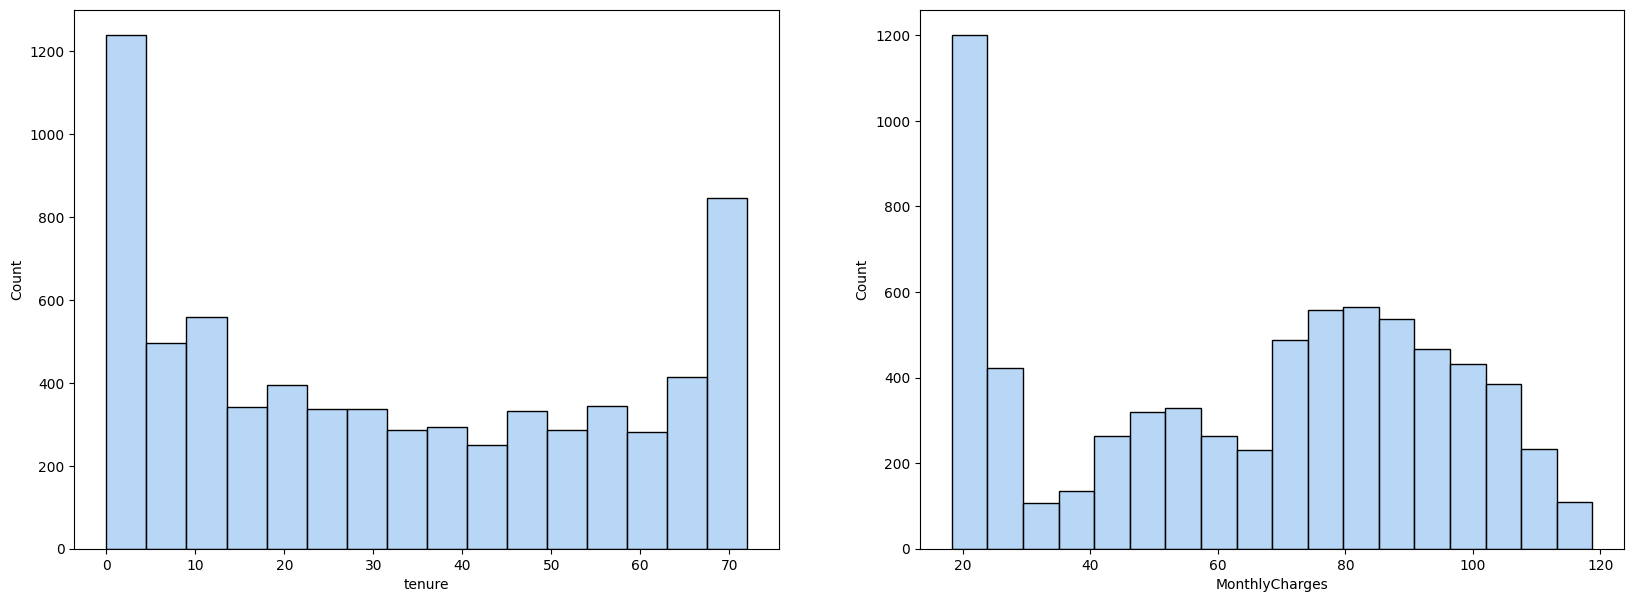

In [55]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(1,2, figsize=(20, 7))
    sns.histplot(churn_data["tenure"], ax=axes[0])
    sns.histplot(churn_data["MonthlyCharges"], ax=axes[1])


In [56]:
# here we replace all values in the churn columns with 1 for a yes and 0 for a no
churn_outcome =  {'Yes':1, 'No':0}
churn_data.Churn.replace(churn_outcome, inplace=True)
churn_outcome

{'Yes': 1, 'No': 0}

In [57]:
# Created a pivot table to summarise churn rate based on geneder and senior citizen
churn_pivot = pd.pivot_table(churn_data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
churn_pivot

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [58]:
print(churn_data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [59]:
#modify the dataframe without creating a new one
churn_data.drop(['customerID','gender'], axis=1, inplace=True)
churn_data.columns


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
#modify the dataframe without creating a new one
churn_data.drop(['Contract','TotalCharges'], axis=1, inplace=True)
churn_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [61]:
# Resampling
no_churn = churn_data[churn_data.Churn == 0]
yes_churn = churn_data[churn_data.Churn == 1]

sampled_churn = yes_churn.sample(n=len(no_churn), replace=True, random_state=42)
print(len(sampled_churn))


5174


In [62]:
#use min max scaling to scale values on an interval of 1 and 0
minmax = MinMaxScaler()
a = minmax.fit_transform(churn_data[['tenure']])
b = minmax.fit_transform(churn_data[['MonthlyCharges']])
churn_data['tenure'] = a
churn_data['MonthlyCharges'] = b

churn_data.shape


(7043, 17)

In [63]:
churn_data.PhoneService.value_counts()


Yes    6361
No      682
Name: PhoneService, dtype: int64

In [64]:
churn_data.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [65]:
#one-hot encode categorical columns to ensure compatibility with ridgeclassifier
categorical_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                       "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                       "StreamingTV", "StreamingMovies", "PaperlessBilling", "PaymentMethod"]

encoded_charn_data = pd.get_dummies(churn_data, columns=categorical_columns, drop_first=True)


In [66]:
from sklearn.model_selection import train_test_split
X = encoded_charn_data.drop(['Churn'], axis=1) #features (independent variables)
y = encoded_charn_data['Churn'] #target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=50)


In [67]:
# Creating a model
ridgeclassifier = RidgeClassifier()


In [68]:
# Fitting Classifier
ridgeclassifier.fit(X_train, y_train)

RidgeClassifier()

In [69]:
# Predicting training values
pred = ridgeclassifier.predict(X_train)

In [70]:
# Getting accuracy
accuracy_score(y_train, pred)

0.8028733711994654

In [71]:
# Predicting testing values
pred_test = ridgeclassifier.predict(X_test)

In [72]:
# Printing accuracy
accuracy_score(y_test, pred_test)


0.8079470198675497

In [73]:
# Creating Model
randomforest = RandomForestClassifier(n_estimators=250, max_depth=18)

# Fitting Model
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=250)

In [74]:
# Pridicting training accuracy
pred = randomforest.predict(X_train)

In [75]:
# Printing training accuracy
accuracy_score(y_train, pred)

0.994988306047444

In [76]:
# Predicting testing accuracy
pred_test = randomforest.predict(X_test)

In [77]:
# Printing testing score
accuracy_score(y_test, pred_test)

0.7814569536423841

In [78]:
# Using Grid Search CV to improve accuracy

# Set parameters
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

# Using Grid Search with Random Forest Classifier
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

# Fit model
clf.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [79]:
# Getting the best parameters and score
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_


0.7884434076392026

Fitting 5 folds for each of 6 candidates, totalling 30 fits


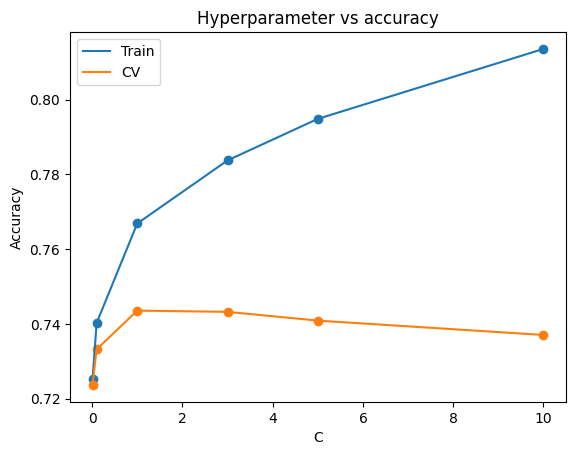

In [80]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svmclf = SVC(class_weight='balanced',random_state=43)
grid = GridSearchCV(estimator=svmclf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

# Plotting the values
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


Train accuracy SVM:  0.7798195790177079
Test accuracy SVM:  0.7436140018921475
Recall Score:  0.7624113475177305


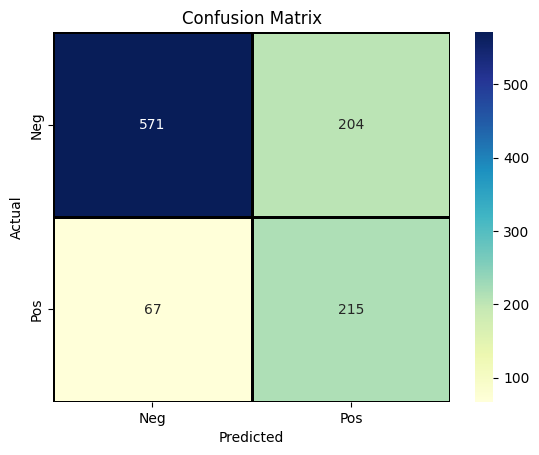

In [81]:
# Training the model using the optimal parameters discovered with SVM Classifier
svmclf =  SVC(C=3,class_weight='balanced', random_state=43)
svmclf.fit(X_train,y_train)

result2 = ["2.","SVM","Balanced using class weights"]
y_pred_tr = svmclf.predict(X_train)
print('Train accuracy SVM: ',accuracy_score(y_train,y_pred_tr))
result2.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = svmclf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result2.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result2.append(round(recall,2))

# Building a confusion matrix
matrix = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(matrix, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


In [82]:
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


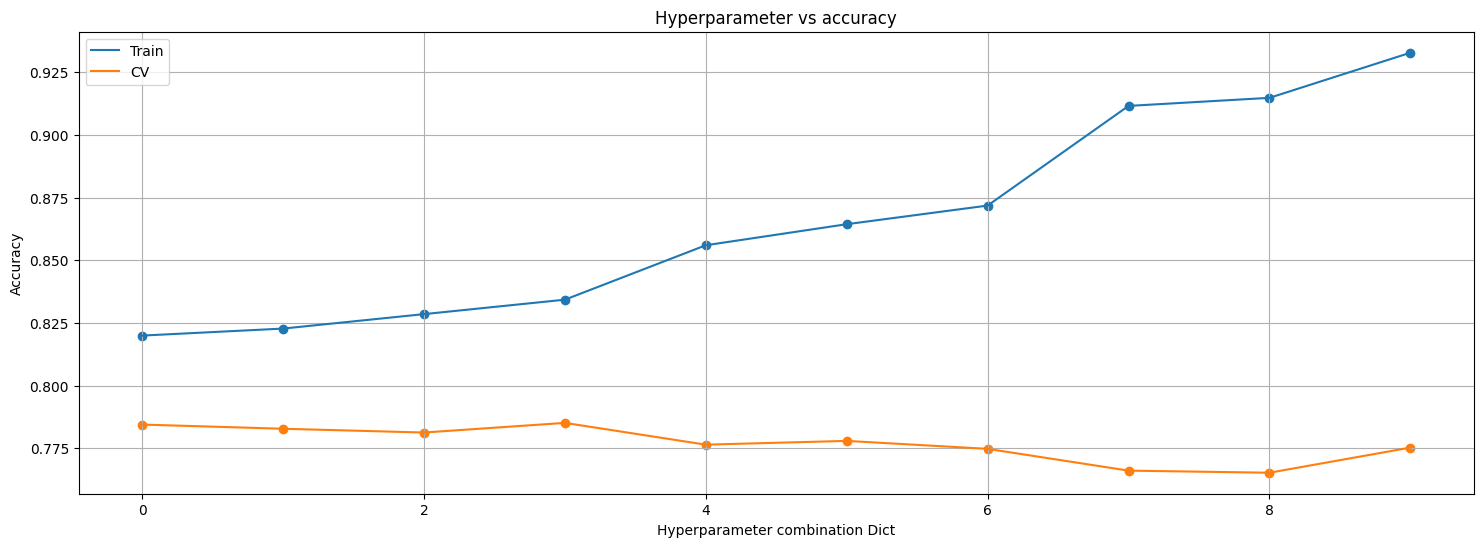

In [83]:
parameters = {
    "learning_rate": stats.uniform(0.1, 0.2),  # Randomly sample from 0.1 to 0.3
    "max_depth": stats.randint(3, 20),  # Randomly sample integers from 3 to 20
    "n_estimators": stats.randint(100, 500),  # Randomly sample integers from 100 to 500
    "colsample_bytree": [0.3, 0.5, 0.7]
}

clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric='mlogloss')
random_search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=parameters,
                                   scoring='accuracy', n_iter=50, return_train_score=True, verbose=1)
random_search.fit(X_train, y_train)

# Plotting only the first 10 train scores for illustration
cv_result = pd.DataFrame(random_search.cv_results_).sort_values(by='mean_train_score', ascending=True)[:10]
param_list = list(cv_result['params'])
param_index = np.arange(10)
plt.figure(figsize=(18, 6))
plt.scatter(param_index, cv_result['mean_train_score'])
plt.plot(param_index, cv_result['mean_train_score'], label='Train')
plt.scatter(param_index, cv_result['mean_test_score'])
plt.plot(param_index, cv_result['mean_test_score'], label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparameter combination Dict')
plt.ylabel('Accuracy')
plt.show()


In [87]:
print(len(param_list))


10


In [88]:
best_parameters = param_list[9]
print(best_parameters)


{'colsample_bytree': 0.3, 'learning_rate': 0.18274025229640803, 'max_depth': 9, 'n_estimators': 127}


Train accuracy XGB: 0.9259939859672569
Test accuracy XGB: 0.7871333964049196
Recall Score:  0.6170212765957447


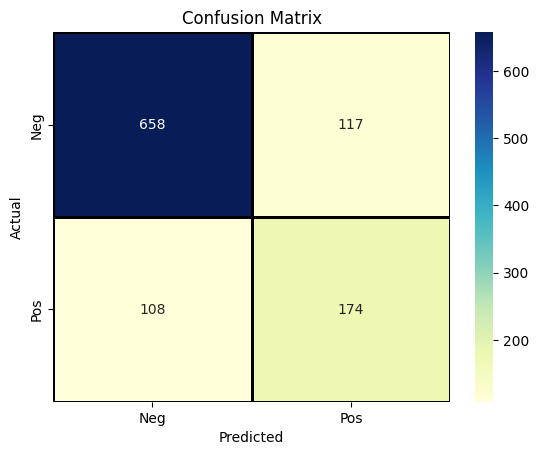

In [92]:
# Using XG Boost
clf_xgb = XGBClassifier(learning_rate= best_parameters['learning_rate'] ,max_depth=best_parameters ['max_depth'], n_estimators=best_parameters['n_estimators'], colsample_bytree=best_parameters['colsample_bytree'],                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

xgbresult = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB:', accuracy_score(y_train, y_pred_tr))
#print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
xgbresult.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB:', accuracy_score(y_test, y_pred_test))
#print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
xgbresult.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
xgbresult.append(round(recall,2))

# Building confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
